In [1]:
# کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\ML\data\heart.csv")
df['oldpeak'] = df['oldpeak'].astype(int)


In [3]:
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slp       303 non-null    int64
 11  caa       303 non-null    int64
 12  thall     303 non-null    int64
 13  output    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB
None
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.0821

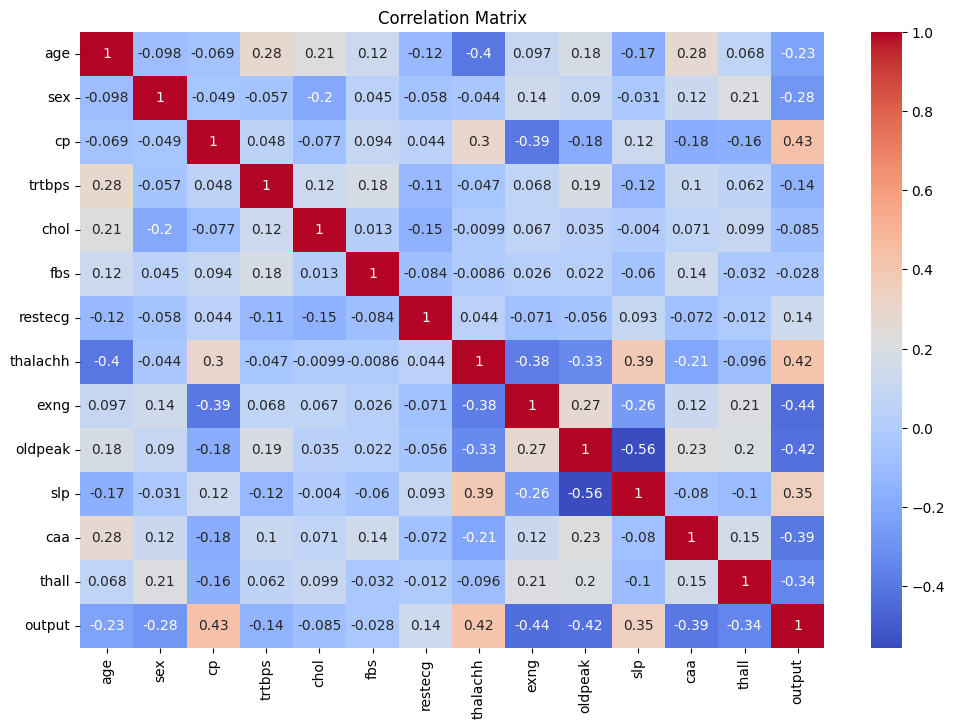

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

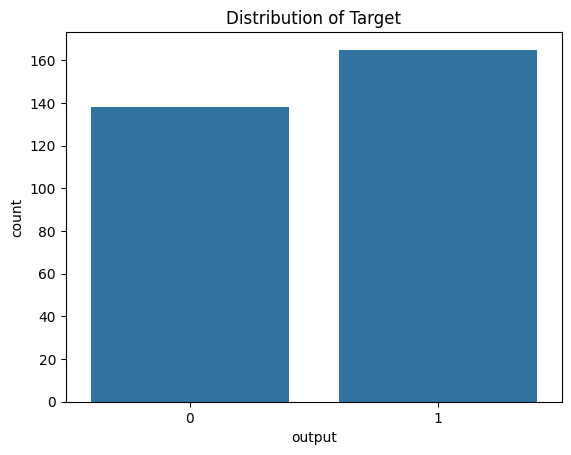

In [5]:
sns.countplot(data=df, x='output')
plt.title("Distribution of Target")
plt.show()

In [6]:
X = df.drop("output", axis=1)
y = df["output"]

In [7]:
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X, y)


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (242, 8)
Test shape: (61, 8)


In [10]:
def compute_f2(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)


In [11]:
log_model = LogisticRegression(C=0.5, max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, log_preds))
print("F2-Score:", compute_f2(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

F2-Score: 0.8333333333333334
Accuracy: 0.7868852459016393


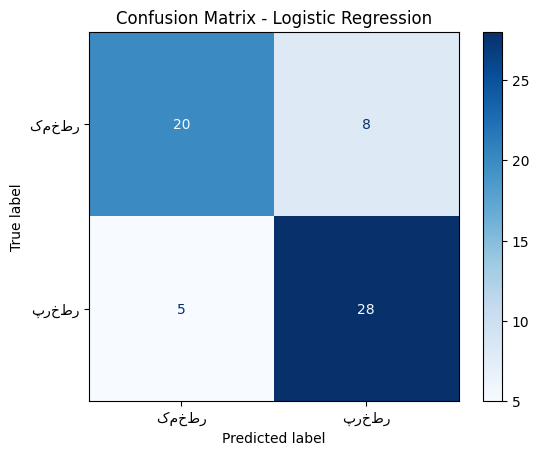

In [12]:
cm = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["کم‌خطر", "پرخطر"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        28
           1       0.71      0.61      0.66        33

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61

F2-Score: 0.625
Accuracy: 0.6557377049180327


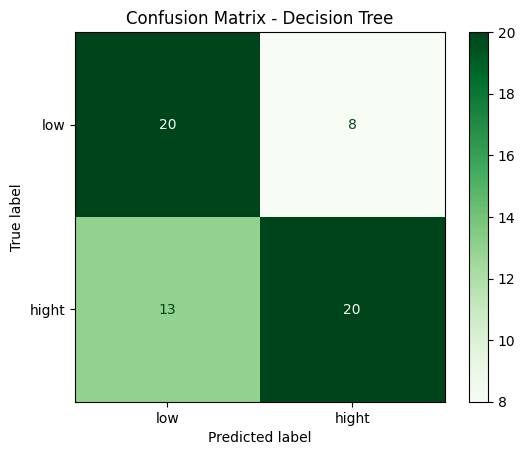

In [13]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                                    min_samples_leaf=2, class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("\nDecision Tree Report:")
print(classification_report(y_test, tree_preds))
print("F2-Score:", compute_f2(y_test, tree_preds))
print("Accuracy:", accuracy_score(y_test, tree_preds))

cm = confusion_matrix(y_test, tree_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "hight"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

F2-Score: 0.8875739644970414
Accuracy: 0.8360655737704918


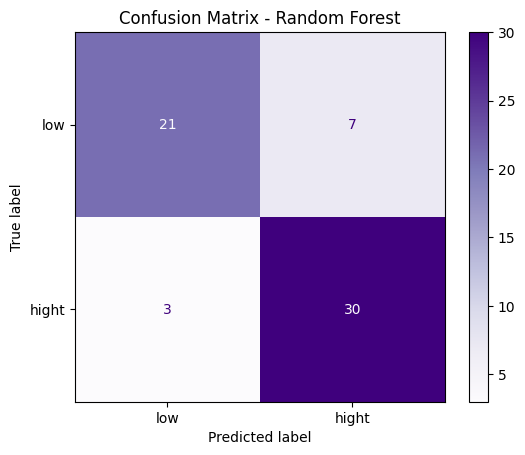

In [14]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_split=4,
                                  min_samples_leaf=2, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_preds))
print("F2-Score:", compute_f2(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "hight"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.show()

c:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:45:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

F2-Score: 0.8771929824561403
Accuracy: 0.8032786885245902


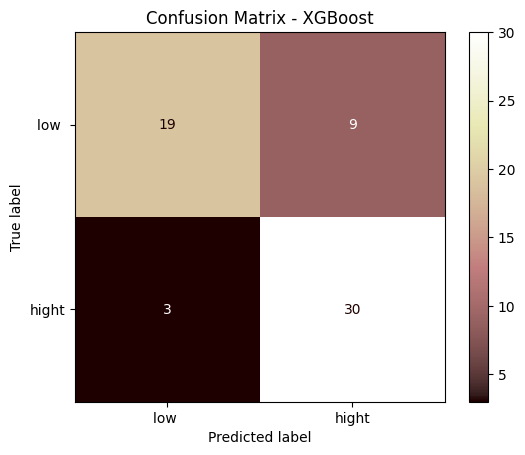

In [15]:

xgb_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, subsample=0.8,
                          colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\nXGBoost Report:")
print(classification_report(y_test, xgb_preds))
print("F2-Score:", compute_f2(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))

cm = confusion_matrix(y_test, xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low ","hight"])
disp.plot(cmap="pink")
plt.title("Confusion Matrix - XGBoost")
plt.show()